# Classification

In [383]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr

from sklearn import tree
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
from sklearn import cross_validation
from sklearn.cross_validation import cross_val_score
#from sklearn import neighbors
#from sklearn import linear_model
#from sklearn.naive_bayes import GaussianNB
#from sklearn import svm

In [384]:
hr_dataset = pd.read_csv("HR_comma_sep.csv")

In [385]:
hr_dataset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  
0     low  
1  medium  
2  medium  
3     low  
4     low

In [386]:
hr_dataset.tail()

satisfaction_level  last_evaluation  number_project  \
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
14994                   151                   3              0     1   
14995                   160                   3              0     1   
14996                   143                   3              0     1   
14997                   280                   4              0     1   
14998                   158                   3              0     1   

       promotion_last_5years    sales salary  
14994                      0  support    low  
14995                      0  support    low  
14996                      0  support    low  
14997                      0  support    low  
14998                      0  support    low

In [387]:
salary_val = ('low', 'medium', 'high')
salary_val_mapping = dict(zip(salary_val, range(1, len(salary_val) + 1)))
salary_val_mapping

{'high': 3, 'low': 1, 'medium': 2}

In [388]:
hr_dataset['salary_val'] = hr_dataset['salary'].map(salary_val_mapping).astype(int)
hr_dataset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  salary_val  
0     low           1  
1  medium           2  
2  medium           2  
3     low           1  
4     low           1

In [389]:
sales_val = hr_dataset['sales'].unique()
sales_val_mapping = dict(zip(sales_val, range(1, len(sales_val) + 1)))
sales_val_mapping

{'IT': 7,
 'RandD': 10,
 'accounting': 2,
 'hr': 3,
 'management': 6,
 'marketing': 9,
 'product_mng': 8,
 'sales': 1,
 'support': 5,
 'technical': 4}

In [390]:
hr_dataset['sales_val'] = hr_dataset['sales'].map(sales_val_mapping).astype(int)
hr_dataset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  sales  \
0                   3              0     1                      0  sales   
1                   6              0     1                      0  sales   
2                   4              0     1                      0  sales   
3                   5              0     1                      0  sales   
4                   3              0     1                      0  sales   

   salary  salary_val  sales_val  
0     low           1          1  
1  medium           2          1  
2  medium           2          1  
3     low           1          1  
4     low           1          1

In [391]:
hr_dataset = hr_dataset.drop(['sales', 'salary', 'salary_val', 'sales_val', 'Work_accident', 'promotion_last_5years'], axis=1)
#hr_dataset = hr_dataset.drop(['sales', 'salary', 'salary_val', 'sales_val'], axis=1)
hr_dataset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  left  
0                   3     1  
1                   6     1  
2                   4     1  
3                   5     1  
4                   3     1

In [392]:
cols = hr_dataset.columns.tolist()
#cols = cols[-3:] + cols[:-3]
#cols = cols[-1:] + cols[:-1]
#cols
cols

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'left']

In [393]:
hr_dataset = hr_dataset[cols]

In [394]:
hr_dataset.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  left  
0                   3     1  
1                   6     1  
2                   4     1  
3                   5     1  
4                   3     1

In [395]:
hr_dataset.dtypes

satisfaction_level      float64
last_evaluation         float64
number_project            int64
average_montly_hours      int64
time_spend_company        int64
left                      int64
dtype: object

In [396]:
#hr_dataset.dtypes[hr_dataset.dtypes.map(lambda x: x == 'object')]

In [397]:
train_data = hr_dataset.values
train_data

array([[  3.80000000e-01,   5.30000000e-01,   2.00000000e+00,
          1.57000000e+02,   3.00000000e+00,   1.00000000e+00],
       [  8.00000000e-01,   8.60000000e-01,   5.00000000e+00,
          2.62000000e+02,   6.00000000e+00,   1.00000000e+00],
       [  1.10000000e-01,   8.80000000e-01,   7.00000000e+00,
          2.72000000e+02,   4.00000000e+00,   1.00000000e+00],
       ..., 
       [  3.70000000e-01,   5.30000000e-01,   2.00000000e+00,
          1.43000000e+02,   3.00000000e+00,   1.00000000e+00],
       [  1.10000000e-01,   9.60000000e-01,   6.00000000e+00,
          2.80000000e+02,   4.00000000e+00,   1.00000000e+00],
       [  3.70000000e-01,   5.20000000e-01,   2.00000000e+00,
          1.58000000e+02,   3.00000000e+00,   1.00000000e+00]])

In [398]:
for i in range(0,4):
    print train_data[i]

[   0.38    0.53    2.    157.      3.      1.  ]
[   0.8     0.86    5.    262.      6.      1.  ]
[  1.10000000e-01   8.80000000e-01   7.00000000e+00   2.72000000e+02
   4.00000000e+00   1.00000000e+00]
[   0.72    0.87    5.    223.      5.      1.  ]


In [399]:
# Training data features, skip the last column 'left'
train_features = train_data[:, :5]

# 'left' column values
train_target = train_data[:, 5]

In [400]:
train_features[0]

array([   0.38,    0.53,    2.  ,  157.  ,    3.  ])

In [401]:
train_target[0]

1.0

# Gini

In [402]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=4, 
                                  min_samples_split=2, min_samples_leaf=16)
clf = clf.fit(train_features, train_target)

In [403]:
clf.feature_importances_

array([ 0.55539523,  0.15028415,  0.09915081,  0.05364032,  0.14152948])

In [404]:
pred_target = clf.predict(train_features)

print metrics.precision_score(train_target, pred_target, average='weighted')
print metrics.recall_score(train_target, pred_target, average='weighted')
print metrics.f1_score(train_target, pred_target, average='weighted')
print metrics.accuracy_score(train_target, pred_target)
#print metrics.precision_recall_fscore_support(train_target, pred_target)

0.967201452948
0.967397826522
0.967248819973
0.967397826522


In [405]:
len(train_data)

14999

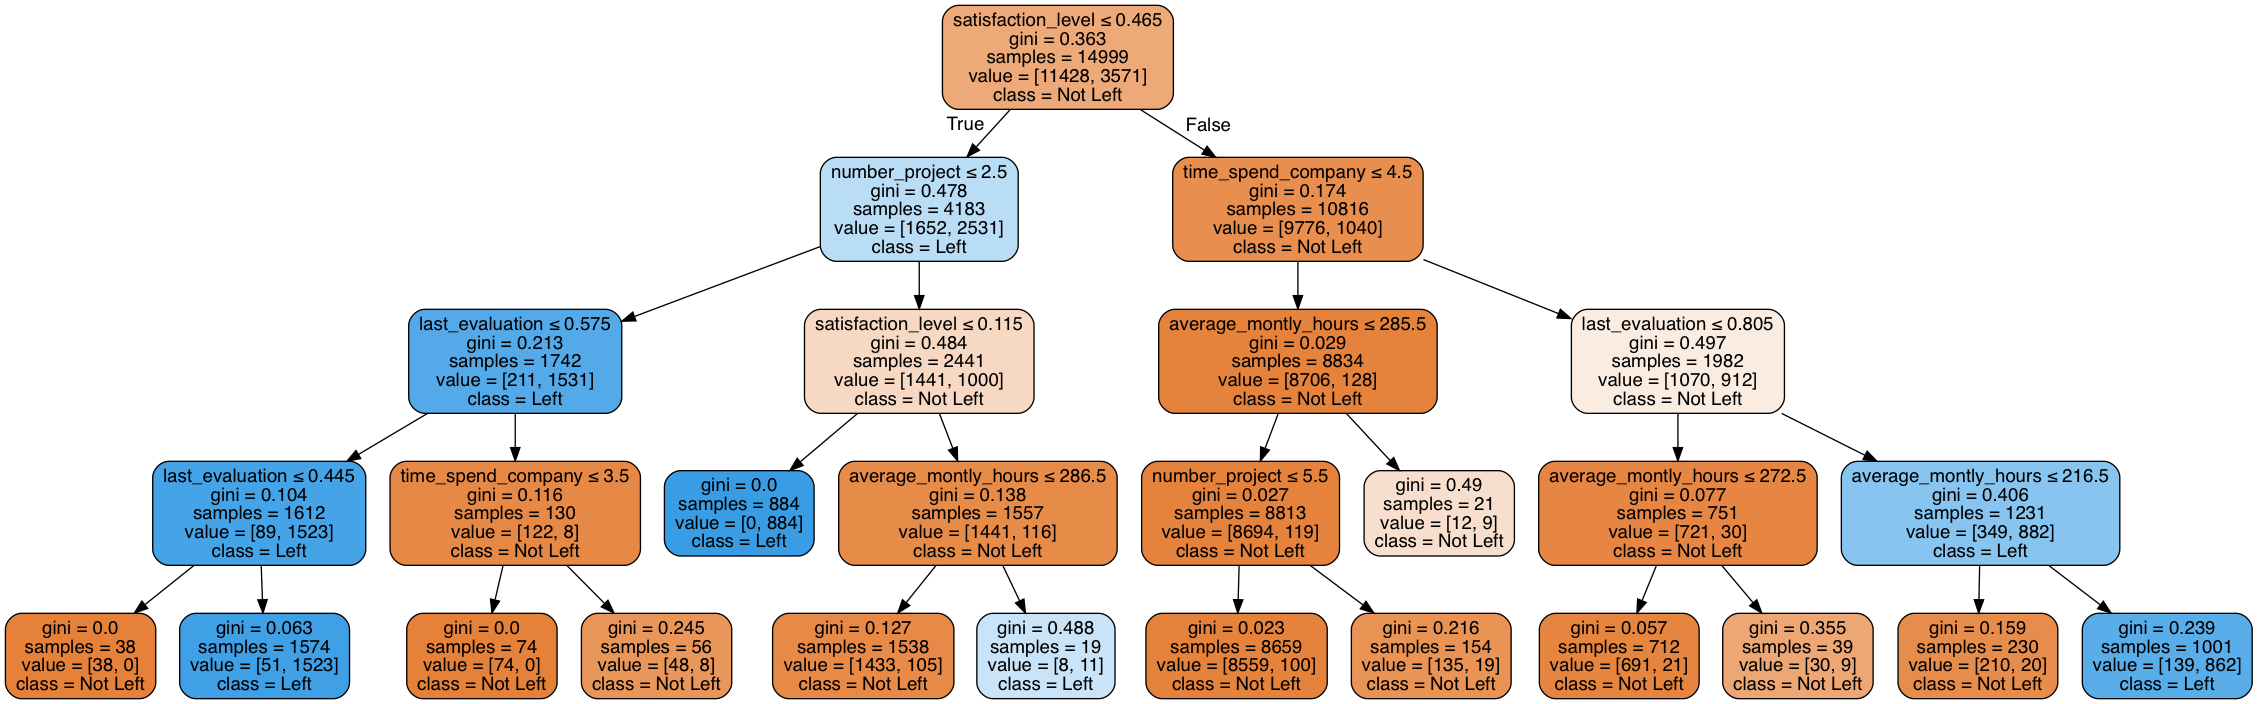

In [406]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(hr_dataset.columns[:5]),  
                         class_names=['Not Left', 'Left'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Entropy

In [407]:
# Fit the model to our training data
clf = tree.DecisionTreeClassifier(criterion='entropy', splitter='best', 
                                  max_depth=6, 
                                  min_samples_split=2, min_samples_leaf=2)
clf = clf.fit(train_features, train_target)

In [408]:
pred_target = clf.predict(train_features)

print metrics.precision_score(train_target, pred_target, average='weighted')
print metrics.recall_score(train_target, pred_target, average='weighted')
print metrics.f1_score(train_target, pred_target, average='weighted')
print metrics.accuracy_score(train_target, pred_target)
print metrics.precision_recall_fscore_support(train_target, pred_target)

0.977177531489
0.977198479899
0.976995177942
0.977198479899
(array([ 0.97759779,  0.9758326 ]), array([ 0.99282464,  0.92719126]), array([ 0.98515238,  0.95089029]), array([11428,  3571]))


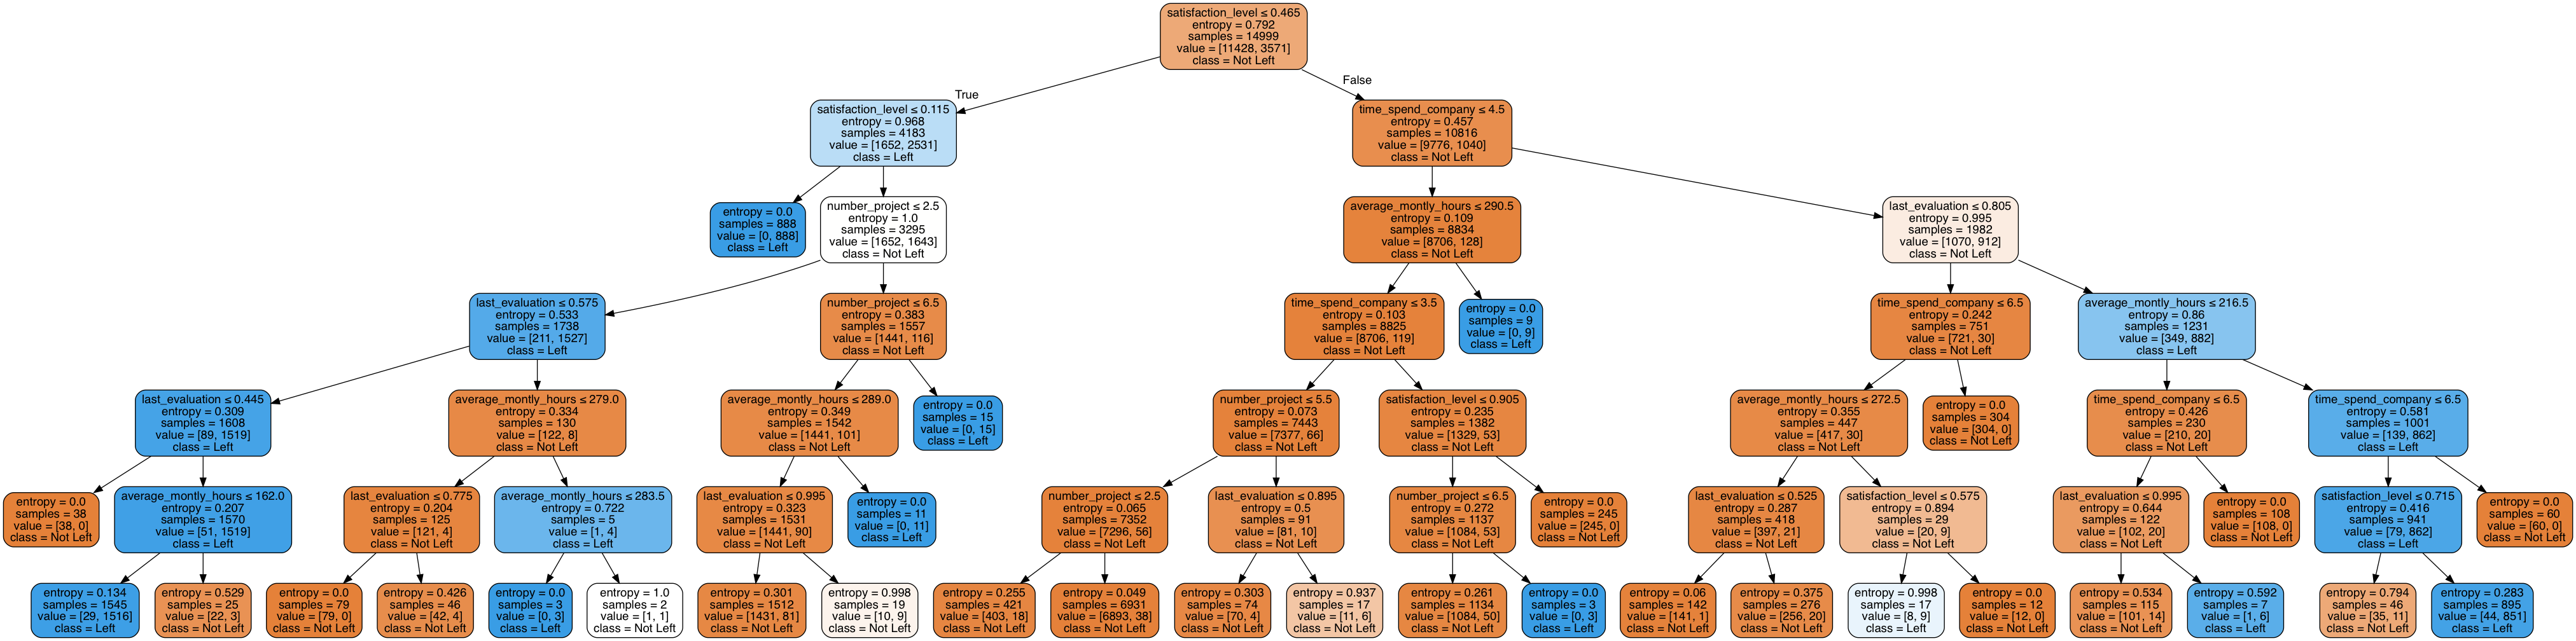

In [409]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(hr_dataset.columns[:5]),  
                         class_names=['Not Left', 'Left'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

# Train Test Partitioning

In [410]:
# Train Test Partitioning
train_x, test_x, train_y, test_y = train_test_split(train_features, 
                                                    train_target, 
                                                    test_size=0.30, 
                                                    random_state=0)

In [411]:
train_x.shape, test_x.shape

((10499, 5), (4500, 5))

In [412]:
clf = tree.DecisionTreeClassifier(criterion='gini', splitter='best', 
                                  max_depth=8, 
                                  min_samples_split=2, min_samples_leaf=2)
clf = clf.fit(train_x, train_y)

In [413]:
train_pred = clf.predict(train_x)
test_pred = clf.predict(test_x)

In [414]:
# Accuracy Evaluation
#print metrics.accuracy_score(train_y, train_pred)
print metrics.accuracy_score(test_y, test_pred)

0.981111111111


In [415]:
#print metrics.precision_score(train_y, train_pred, average='weighted')
print metrics.precision_score(test_y, test_pred, average='weighted')

0.981073923073


In [416]:
#print metrics.recall_score(train_y, train_pred, average='weighted')
print metrics.recall_score(test_y, test_pred, average='weighted')

0.981111111111


In [417]:
#print metrics.f1_score(train_y, train_pred, average='weighted')
print metrics.f1_score(test_y, test_pred, average='weighted')

0.980976425358


In [418]:
cm = confusion_matrix(test_y, test_pred)
print cm

[[3440   22]
 [  63  975]]


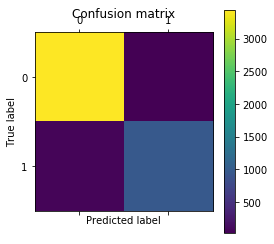

In [419]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

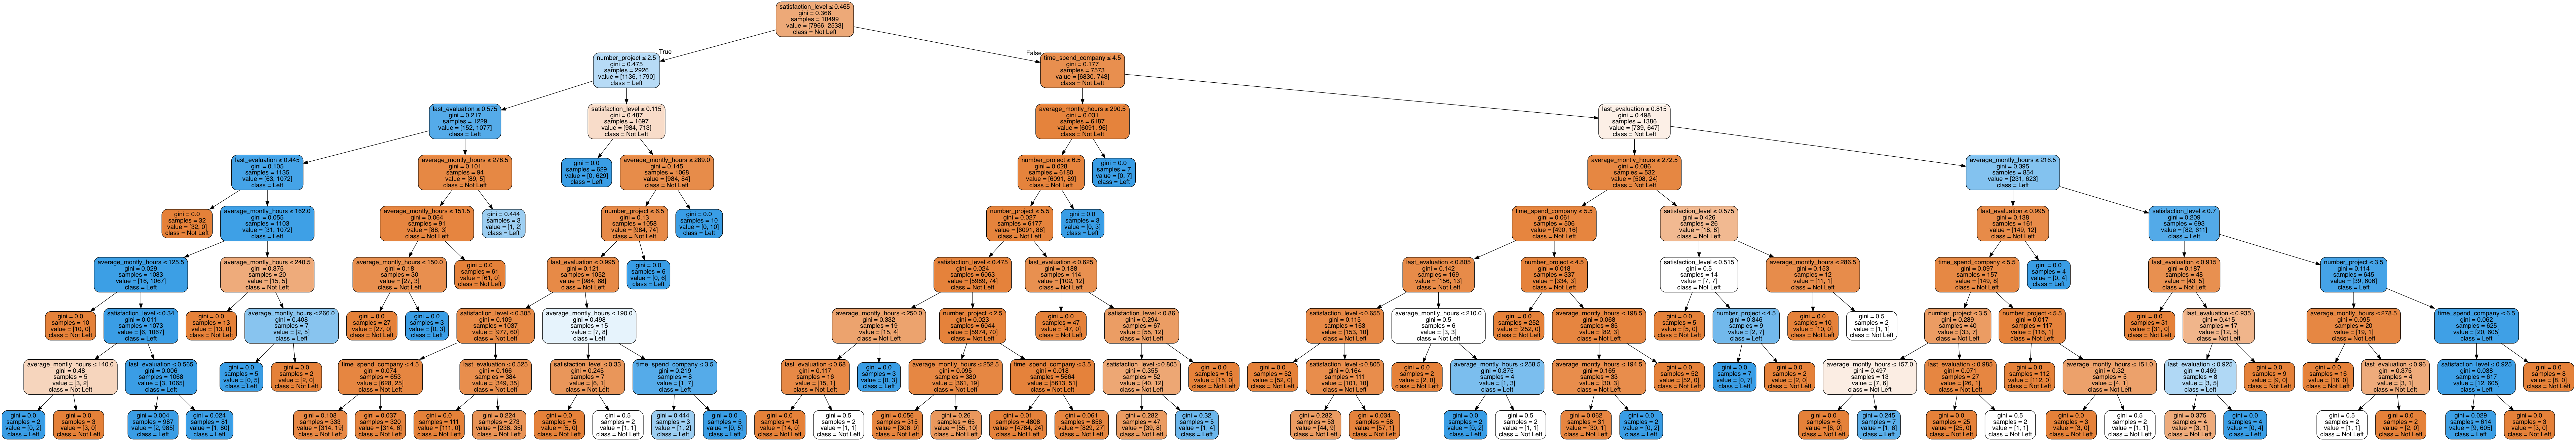

In [420]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=list(hr_dataset.columns[:5]),  
                         class_names=['Not Left', 'Left'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

0.96647582506


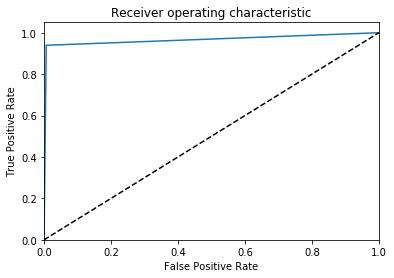

In [421]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(test_y, test_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print roc_auc_score(test_y, test_pred)
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [350]:
from sklearn.metrics import classification_report
print(classification_report(test_y, 
                            test_pred, 
                            target_names=['Not Left', 'Left']))

             precision    recall  f1-score   support

   Not Left       0.98      0.99      0.99      3462
       Left       0.98      0.93      0.96      1038

avg / total       0.98      0.98      0.98      4500



In [351]:
# Cross Validation
scores = cross_validation.cross_val_score(clf, 
                                          train_features, train_target, 
                                          cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.98 (+/- 0.01)


In [352]:
print scores

[ 0.98600933  0.98        0.97866667  0.97533333  0.97533333  0.97933333
  0.98666667  0.978       0.98532355  0.98332221]


In [92]:
# Random Forest 1

clf = RandomForestClassifier(n_estimators=100, 
                             criterion='gini',
                             max_features=None,
                             max_depth=None, 
                             min_samples_split=2,
                             min_samples_leaf=5,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.98 (+/- 0.01)


In [93]:
# Random Forest 2

clf = RandomForestClassifier(n_estimators=100, 
                             criterion='entropy',
                             max_features=None,
                             max_depth=None, 
                             min_samples_split=2,
                             min_samples_leaf=5,
                             bootstrap=True,
                             oob_score=False,
                             random_state=None,
                             class_weight=None) #balanced
scores = cross_validation.cross_val_score(clf, train_features, train_target, cv=10)
print 'Accuracy: %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() * 2)

Accuracy: 0.98 (+/- 0.01)


In [94]:
from scipy.stats import randint as sp_randint

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [95]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [96]:
clf = RandomForestClassifier(n_estimators=100)

In [97]:
param_dist = {"max_depth": [2,3,4,5,6,7,8,9,10,11,12,None],
              "max_features": sp_randint(1, len(train_x[0]) + 1),
              "min_samples_split": sp_randint(10, 51),
              "min_samples_leaf": sp_randint(10, 51),
              "bootstrap": [True],
              "criterion": ["entropy", "gini"],
              "class_weight":['balanced', None, {0: 0.3, 1: 0.7}]}

n_iter_search = 100
search = RandomizedSearchCV(clf, param_distributions=param_dist, 
                            n_iter=n_iter_search, 
                            n_jobs=10, 
                            scoring=make_scorer(accuracy_score))

In [98]:
search.fit(train_features, train_target)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=10,
          param_distributions={'bootstrap': [True], 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x110820290>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x110aa9b50>, 'criterion': ['entropy', 'gini'], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x110aa9e10>, 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, None], 'class_weight': ['balanced', None, {0: 0.

In [99]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.974 (std: 0.002)
Parameters: {'bootstrap': True, 'min_samples_leaf': 15, 'min_samples_split': 48, 'criterion': 'entropy', 'max_features': 1, 'max_depth': 7, 'class_weight': None}

Model with rank: 1
Mean validation score: 0.974 (std: 0.002)
Parameters: {'bootstrap': True, 'min_samples_leaf': 24, 'min_samples_split': 47, 'criterion': 'entropy', 'max_features': 1, 'max_depth': None, 'class_weight': None}

Model with rank: 3
Mean validation score: 0.974 (std: 0.002)
Parameters: {'bootstrap': True, 'min_samples_leaf': 19, 'min_samples_split': 29, 'criterion': 'entropy', 'max_features': 1, 'max_depth': 10, 'class_weight': None}



In [100]:
param_grid = {"max_depth": [2,3,4,5,6]}
search = GridSearchCV(clf, param_grid=param_grid, scoring=make_scorer(accuracy_score))

In [101]:
search.fit(train_features, train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn',
       scoring=make_scorer(accuracy_score), verbose=0)

In [102]:
report(search.cv_results_, 3) #search.best_estimator_.estimators_[0]

Model with rank: 1
Mean validation score: 0.976 (std: 0.002)
Parameters: {'max_depth': 6}

Model with rank: 2
Mean validation score: 0.973 (std: 0.004)
Parameters: {'max_depth': 5}

Model with rank: 3
Mean validation score: 0.969 (std: 0.004)
Parameters: {'max_depth': 4}



In [103]:
search.best_estimator_.estimators_[0]

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False,
            random_state=1046972085, splitter='best')

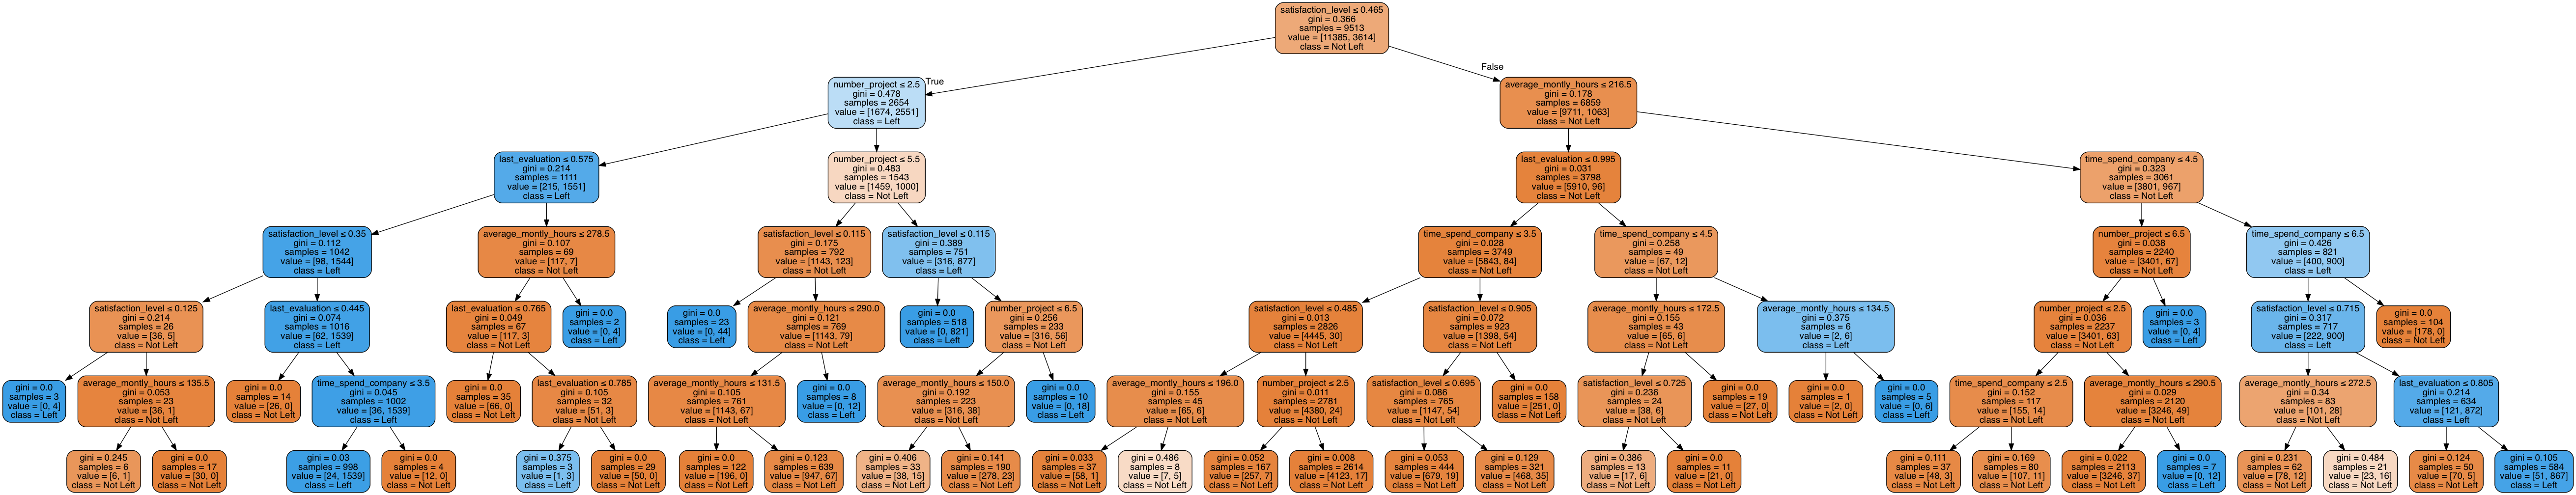

In [105]:
import pydotplus 
from IPython.display import Image  
dot_data = tree.export_graphviz(search.best_estimator_.estimators_[0], out_file=None, 
                         feature_names=list(hr_dataset.columns[:5]),  
                         class_names=['Not Left', 'Left'],  
                         filled=True, rounded=True,  
                         special_characters=True,
                               max_depth=6)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())